In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout
from keras.layers import LSTM

Using TensorFlow backend.


In [9]:
dataset = pd.read_csv("../data/gesture7.txt")

In [10]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,gesture
0,0.41,0.48,0.01,0.22,1.00,0.28,0.12,0.30,0.07,0.14,0.00,0.06,0.22,0.09,0.32,0.08,3
1,0.13,0.18,0.08,0.13,0.52,0.32,0.52,0.26,0.12,0.02,0.07,0.00,1.00,0.34,0.39,0.21,3
2,0.02,0.04,0.00,0.59,0.31,0.07,0.48,0.56,0.10,1.00,0.20,0.04,0.85,0.01,0.61,0.47,3
3,0.22,0.53,0.00,0.53,0.46,0.02,0.87,0.01,0.28,0.50,0.20,0.24,1.00,0.05,0.20,0.18,3
4,0.46,0.58,0.28,0.08,0.48,0.31,1.00,0.89,0.01,0.13,0.06,0.04,0.80,0.70,0.58,0.86,3


In [11]:
dataset = dataset.dropna()
dataset_train = np.array(dataset)
dataset_train = dataset_train[np.random.permutation(len(dataset_train))]
X_train = dataset_train[:,:-1]
Y_train = dataset_train[:,-1:]

In [12]:
Y_train = [int(i) for i in Y_train]
Y_train = np.eye(np.max(Y_train) + 1)[Y_train]
Y_train.shape


(3713, 7)

In [13]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [14]:
model = Sequential()

model.add(Dense(16, input_shape=(16,)))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Dense(7, activation="softmax"))

In [16]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 32, verbose=2,validation_split=0.2)

Train on 2970 samples, validate on 743 samples
Epoch 1/100
 - 0s - loss: 0.1980 - accuracy: 0.9191 - val_loss: 0.1819 - val_accuracy: 0.9241
Epoch 2/100
 - 0s - loss: 0.1973 - accuracy: 0.9169 - val_loss: 0.1828 - val_accuracy: 0.9237
Epoch 3/100
 - 0s - loss: 0.1977 - accuracy: 0.9176 - val_loss: 0.1808 - val_accuracy: 0.9237
Epoch 4/100
 - 0s - loss: 0.2012 - accuracy: 0.9152 - val_loss: 0.1858 - val_accuracy: 0.9214
Epoch 5/100
 - 0s - loss: 0.1999 - accuracy: 0.9177 - val_loss: 0.1818 - val_accuracy: 0.9241
Epoch 6/100
 - 0s - loss: 0.1982 - accuracy: 0.9166 - val_loss: 0.1804 - val_accuracy: 0.9231
Epoch 7/100
 - 0s - loss: 0.1966 - accuracy: 0.9160 - val_loss: 0.1846 - val_accuracy: 0.9204
Epoch 8/100
 - 0s - loss: 0.2014 - accuracy: 0.9157 - val_loss: 0.1810 - val_accuracy: 0.9225
Epoch 9/100
 - 0s - loss: 0.1985 - accuracy: 0.9176 - val_loss: 0.1831 - val_accuracy: 0.9217
Epoch 10/100
 - 0s - loss: 0.1967 - accuracy: 0.9171 - val_loss: 0.1797 - val_accuracy: 0.9239
Epoch 11/100

Epoch 87/100
 - 0s - loss: 0.1962 - accuracy: 0.9169 - val_loss: 0.1829 - val_accuracy: 0.9225
Epoch 88/100
 - 0s - loss: 0.1946 - accuracy: 0.9189 - val_loss: 0.1824 - val_accuracy: 0.9214
Epoch 89/100
 - 0s - loss: 0.1933 - accuracy: 0.9191 - val_loss: 0.1793 - val_accuracy: 0.9252
Epoch 90/100
 - 0s - loss: 0.1969 - accuracy: 0.9174 - val_loss: 0.1830 - val_accuracy: 0.9219
Epoch 91/100
 - 0s - loss: 0.1949 - accuracy: 0.9178 - val_loss: 0.1828 - val_accuracy: 0.9221
Epoch 92/100
 - 0s - loss: 0.1998 - accuracy: 0.9172 - val_loss: 0.1816 - val_accuracy: 0.9242
Epoch 93/100
 - 0s - loss: 0.1959 - accuracy: 0.9200 - val_loss: 0.1839 - val_accuracy: 0.9229
Epoch 94/100
 - 0s - loss: 0.1931 - accuracy: 0.9182 - val_loss: 0.1821 - val_accuracy: 0.9231
Epoch 95/100
 - 0s - loss: 0.1960 - accuracy: 0.9196 - val_loss: 0.1833 - val_accuracy: 0.9210
Epoch 96/100
 - 0s - loss: 0.1946 - accuracy: 0.9197 - val_loss: 0.1801 - val_accuracy: 0.9231
Epoch 97/100
 - 0s - loss: 0.1923 - accuracy: 0.91

Text(0.5, 1.0, 'Accuracy')

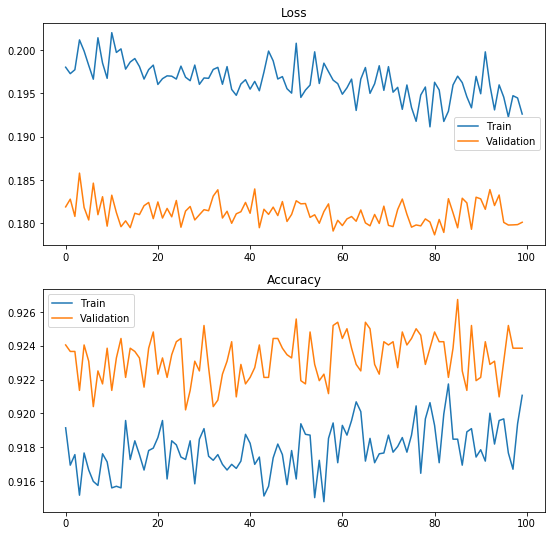

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.title("Accuracy")

In [38]:
history.params

{'batch_size': 32,
 'epochs': 250,
 'steps': None,
 'samples': 1724,
 'verbose': 2,
 'do_validation': True,
 'metrics': ['loss', 'val_loss']}